##### function to carry out histogram equalization

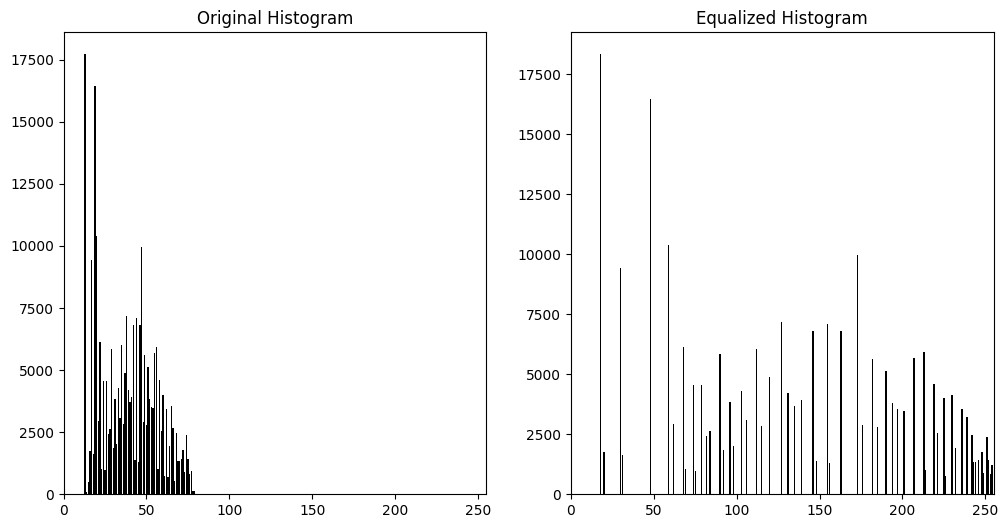

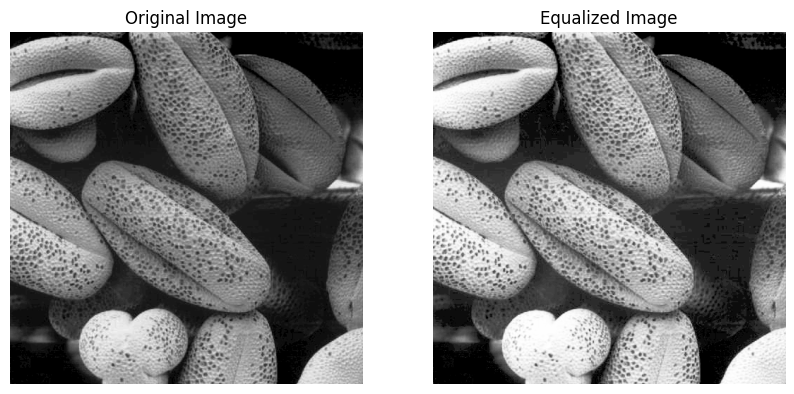

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_histogram(image):
    """ Calculate the histogram """
    histogram = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogram[pixel] += 1
    return histogram

def equalize_histogram(image):
    """ Perform histogram equalization on an image. """
    # Calculate the histogram
    hist = calculate_histogram(image)
    
    # Calculate the cumulative distribution function (CDF)
    cdf = np.cumsum(hist)

    # Normalize the CDF
    cdf_normalized = (cdf) * 255 / cdf.max()
    cdf_normalized = cdf_normalized.astype(np.uint8)

    # Use the normalized CDF to map the original image pixels to equalized values
    equalized_image = cdf_normalized[image]
    
    return equalized_image, hist, calculate_histogram(equalized_image)

# Load the image in grayscale
image = cv2.imread(r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\shells.tif", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("The specified image file was not found.")

# Perform histogram equalization
equalized_image, original_hist, equalized_hist = equalize_histogram(image)

# Visualization of the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(256), original_hist, color='black')
plt.title('Original Histogram')
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.bar(range(256), equalized_hist, color='black')
plt.title('Equalized Histogram')
plt.xlim([0, 255])
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()


##### Open the Image and Split into HSV Components

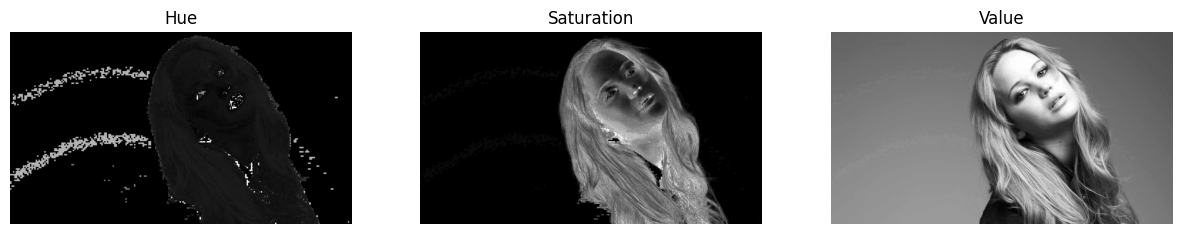

In [3]:
image_path = r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\jeniffer.jpg"
image = cv2.imread(image_path)

# Convert to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(image_hsv)

# Display the hue, saturation, and value planes
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue')
ax[0].axis('off')

ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis('off')

ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value')
ax[2].axis('off')

plt.show()


##### Thresholding to Extract the Foreground Mask

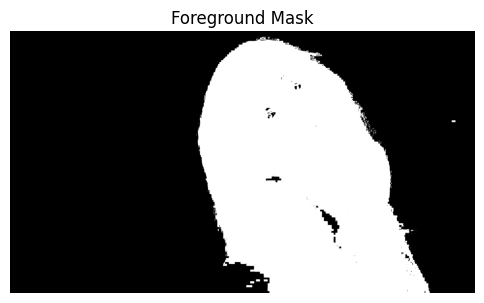

In [24]:
import numpy as np

# value component is best for extracting the foreground
_, mask = cv2.threshold(saturation, 11, 255, cv2.THRESH_BINARY)

# Display the mask
plt.figure(figsize=(6, 4))
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.show()


##### Apply Mask and Compute Histogram of the Foreground

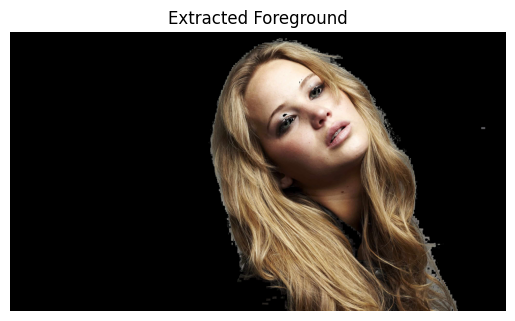

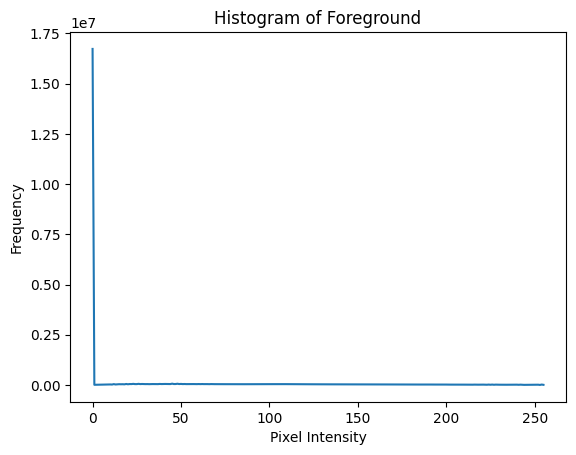

In [25]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract the foreground using the mask
foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Calculate histogram of the foreground
histogram = calculate_histogram(foreground)


# Display the extracted foreground
plt.figure()
plt.title('Extracted Foreground')
plt.imshow(foreground, cmap='gray')
plt.axis('off')
plt.show()


# Display the histogram
plt.figure()
plt.title('Histogram of Foreground')
plt.plot(histogram)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


##### Calculate the Cumulative Histogram

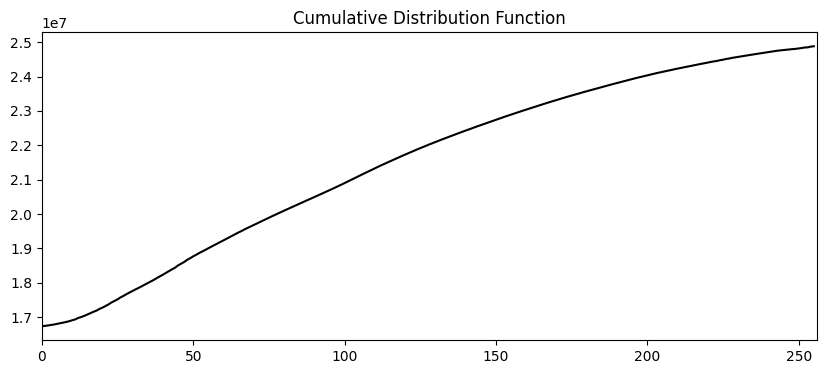

In [26]:
# Calculate the cumulative sum of the histogram
cdf = np.cumsum(histogram)

# Display the CDF
plt.figure(figsize=(10, 4))
plt.plot(cdf, color='black')
plt.title('Cumulative Distribution Function')
plt.xlim([0, 256])
plt.show()


#####  histogram-equalize the foreground

In [22]:
# Normalize the CDF
cdf_normalized = (cdf) * histogram.max() / (cdf.max())
cdf_normalized = cdf_normalized.astype(np.uint8)

# Map the value plane
equalized_value = cdf_normalized[foreground]

##### Histogram Equalization of the Foreground and Combine with Background

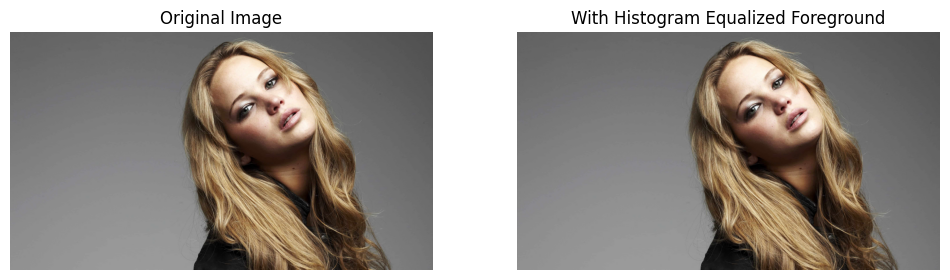

In [28]:
# extarct background from original image
background_image = cv2.bitwise_and(image_rgb, image_rgb, mask=~mask)

# Combine background and equalized foreground
final_image = cv2.add(background_image, foreground)

# Display the original and final images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title('With Histogram Equalized Foreground')
plt.axis('off')
plt.show()
